In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import odesahwmodel as od
global bits, label_num, eta, delta
bits = 8
label_num = 4
eta = 1./8
delta = 0x0f


def draw_output_spikes(x): # x is layer output 
    for i in range(len(x)):
        plt.stem(x[i],len(x[i])*[od.onehot(i+1)])
        
        
def get_gas(label):
    ts_gas= []
    for i in range(len(label)):
        ts_gas.append(od.flatten_ts(label[i]))
    return od.flatten_ts(ts_gas)


def get_las(input_spikes, neuron_indices, neuron_num):
    return od.flatten_ts(od.layer_output_spike(input_spikes,neuron_indices,neuron_num))


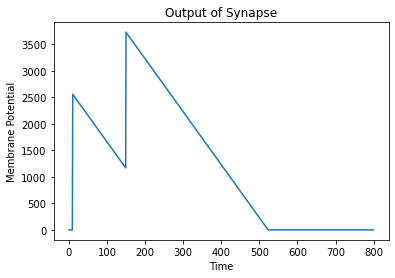

3730

In [2]:
# Generate a Synapse spiked at 10 and 150

synapse = od.Synapse(w=10, ts=[10,150])
output = synapse.run(time=800)

plt.plot(range(800), output)
plt.xlabel('Time')
plt.ylabel('Membrane Potential')
plt.title('Output of Synapse')
plt.show()
#value of the synapse output at time = t
synapse.run(time = 151)[-1]

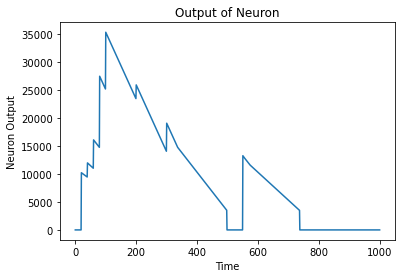

25920

In [3]:
# Construct a neuron with four Synapses 
synapse_weights = [40, 10, 20, 50]

# [[Spikes on synapse 1], [Spikes on synapse 2], [Spikes on synapse 3] ... ]
synapse_spikes = [[20, 100],[40,200],[60,300],[80,550]] 
th = 3500
neuron = od.Neuron(n=4, synapse_weights=synapse_weights, synapse_spikes=synapse_spikes, threshold=th)

output = neuron.run(time=1000)
plt.plot(range(1000), output)
plt.xlabel('Time')
plt.ylabel('Neuron Output')
plt.title('Output of Neuron')
plt.show()

neuron.run(time=180)[-1]

1970

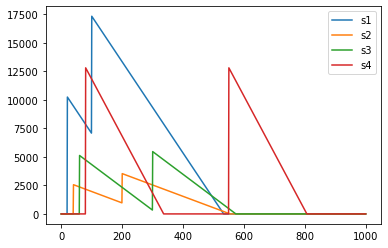

In [4]:
sy = neuron.synapses
for i in sy:
    plt.plot(i.run(time =1000))
plt.legend(["s1", "s2", "s3", "s4"])
#individual synapse value
neuron.synapses[0].run(time=100)[-1]
neuron.synapses[1].run(time=100)[-1]

In [5]:
#Create a layer of ODESA
# Define the synapse weights and spike times for each neuron
neuron_num = 2
neuron_input_num = 2
neuron1_synapse_weights = [10, 30]
neuron1_threshold = 1000
neuron2_synapse_weights = [40, 50]
neuron2_threshold = 10000
thresholds = [neuron1_threshold, neuron2_threshold]
synapse_weights = [neuron1_synapse_weights, neuron2_synapse_weights]
spike_times = [[50], [100, 200]]
# Initialize the layer with two neurons
layer = od.Layer(neuron_num=neuron_num, neuron_input_num=neuron_input_num, synapse_weights=synapse_weights, 
                 synapse_spikes=spike_times, threshold=thresholds)

# Run the simulation for 1000 time steps
layer_raw_values = layer.runlayer(time=1000)[0]
neuron_indices = layer.runlayer(time=1000)[1]


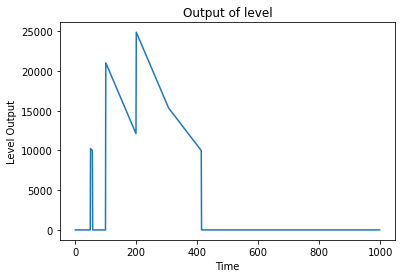

In [6]:
plt.plot(range(999), layer_raw_values)
plt.xlabel('Time')
plt.ylabel('Level Output')
plt.title('Output of level')
plt.show()

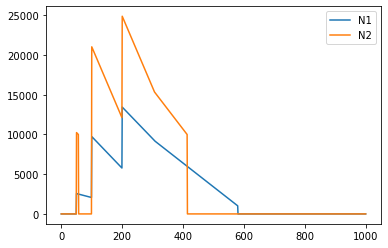

In [7]:
for n in layer.neurons:
    plt.plot(range(1000), n.run(time=1000))
    
plt.legend(["N1", "N2"])

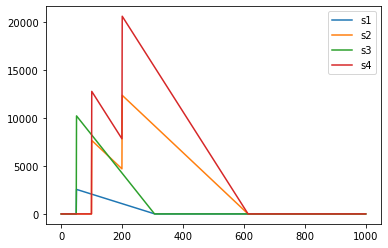

In [8]:
m=layer.neurons
for i in m:
    for l in range(len(i.synapses)):
        j= (i.synapses[l])
        plt.plot(range(1000), j.run(time=1000))
#for k in range(len(j)):
#    plt.plot(range(1000), k.run(time=1000))

plt.legend(["s1","s2","s3","s4"])

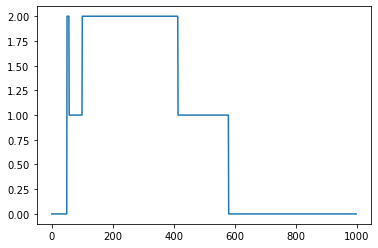

In [9]:
plt.plot(range(999), neuron_indices)

In [ ]:
#layer with four neurons each neuron 2 inputs
neuron_num = 4
neuron_input_num = 2
neuron1_synapse_weights = [250, 50]
neuron1_threshold = 20000
neuron2_synapse_weights = [50, 250]
neuron2_threshold = 20000
neuron3_synapse_weights = [200, 230]
neuron3_threshold = 80000
neuron4_synapse_weights = [230, 200]
neuron4_threshold = 80000
thresholds = [neuron1_threshold, neuron2_threshold, neuron3_threshold, neuron4_threshold]
synapse_weights = [neuron1_synapse_weights, neuron2_synapse_weights, neuron3_synapse_weights, neuron4_synapse_weights]
spike_times = [[100, 200, 1300, 2100],[600, 700, 1400,2000] ]

# Initialize the layer with two neurons
L2 = od.Layer(neuron_num=neuron_num, neuron_input_num=neuron_input_num, synapse_weights= synapse_weights, synapse_spikes= spike_times, threshold= thresholds)

# Run the simulation for 1000 time steps
lo = L2.runlayer(time=2500)[0]
neuron_indices = L2.runlayer(time=2500)[1]
x = od.layer_output_spike(spike_times,  L2.runlayer(time=2500)[1], neuron_num )
#neuron_indexes

In [ ]:
for n in L2.neurons:
    plt.plot(range(2500), n.run(time=2500))
plt.legend(["N1", "N2", "N3", "N4"])



In [ ]:
plt.plot(neuron_indices)

In [ ]:
x = od.layer_output_spike(spike_times,neuron_indices,neuron_num)
x

In [ ]:
draw_output_spikes(x)     

In [11]:
i=0;
label_time_stamp = max(od.flatten_ts(label_spikes[i]))
if neuron_indices[label_time_stamp] == od.onehot(i+1): # if label = spike
    reward(i,label_time_stamp,eta )
else:
    punish(i, delta=0x0f)
    

NameError: name 'label_spikes' is not defined

In [135]:
def reward(i, t, eta = 1./8):
    m = L2.neurons
    s = m[i].synapses
    s[i].run(time=t)
    tr = int(s[i].membrane_potential/2**bits)
    lv = m[i].run(t)[-1]
    for j in range(neuron_input_num): #len(synapse_weights[0])):
        synapse_weights[i][j] = synapse_weights[i][j]-int(eta*(synapse_weights[i][j]-tr))
    threshold[i] = threshold[i] - int(eta*(threshold[i] - lv))
    
def punish(i,delta=0xf):
     threshold[i] = int(threshold[i] - delta)


In [136]:
#threshold = [10000, 20000,30000,40000]
synapse_weights = [neuron1_synapse_weights, neuron2_synapse_weights, neuron3_synapse_weights, neuron4_synapse_weights]

reward(0,200,eta=1./8)
threshold


[51911, 15283, 29985, 39985]

In [137]:
synapse_weights

[[237, 83], [50, 250], [200, 230], [230, 200]]

In [ ]:
label_spikes = [
                [[110],[],[],[]],
                [[],[600],[],[]],
                [[],[],[1100],[]],
                [[],[],[],[1600]]
               ]

training_spikes = [
                   [[100,110],[]],
                   [[],[500,600]],
                   [[1000],[1100]], 
                   [[1600],[1500]]
                  ]

spike_times = [
                   [[100,110],[]],
                   [[],[500,600]],
                   [[1000],[1100]], 
                   [[1600],[1500]]
              ]


In [45]:
''' 
    if event = od.flatten_ts(spike_times[k]) for data pattern l
    the data pattern k , has the label label_spikes[k]
    the time stamp of the label is obtained by od.flatten_ts(label_spikes[k])[0]
    
'''
# training process starts here:
label_patterns = 4
epochs = 1
for e in range(epochs):
    for l in range(label_patterns):
        ts_input_events = od.flatten_ts(spike_times[l])
        ts_label = od.flatten_ts(label_spikes[l])[0]
        id_label = od.label_index(label_spikes[l])
        for j in ts_input_events: # for each input event
            if j == ts_label:  # if there is a label
                if od.onehot(id_label+1) == neuron_indices[ts_label]: # if label = winner
                    reward(id_label, ts_label, eta)
                else:
                    punish(id_label, delta)


NameError: name 'reward' is not defined

In [38]:
'''
Do training for layer L2
'''

label_patterns = 4
epochs = 1
for e in range(epochs):
    for l in range(label_patterns):
        input_spikes = spike_times[l]  
        sim_time = max(od.flatten_ts(input_spikes)) + 0xff
        '''
           Get the spike pattern and run the odesa for that time window + 0xff
        '''
        #set up odesa layer 
        L2 = od.Layer(neuron_num=neuron_num, neuron_input_num=neuron_input_num, synapse_weights= synapse_weights, synapse_spikes= input_spikes, threshold= thresholds)
        # Run the simulation for "simtime" time steps
        level_output = L2.runlayer(time=sim_time)[0]
        neuron_indices = L2.runlayer(time=sim_time)[1]
        ts_output_spikes = od.layer_output_spike(input_spikes, L2.runlayer(time=sim_time)[1], neuron_num )
        #now run the training algorithm
        ts_input_events = od.flatten_ts(spike_times[l])
        ts_label = od.flatten_ts(label_spikes[l])[0]
        id_label = od.label_index(label_spikes[l])
        for j in ts_input_events: # for each input event
            if j == ts_label:  # if there is a label
                if od.onehot(id_label+1) == neuron_indices[ts_label]: # if label = winner
                    reward(id_label, ts_label, eta)
                else:
                    punish(id_label, delta)

NameError: name 'reward' is not defined

In [14]:
i=1
m = L2.neurons
s = m[i].synapses
s[i].run(time=t)


NameError: name 't' is not defined

In [222]:
#def reward_hl(i, t, eta = 1./8):
m = L2.neurons


In [15]:
for i in m:
    print(i.synapse_weights)


[250, 50]
[50, 250]
[200, 230]
[230, 200]


In [46]:
m[0].run(time=40)
m[0].synapses[0].run(time=120)
m[0].synapses[0].time_surface

0

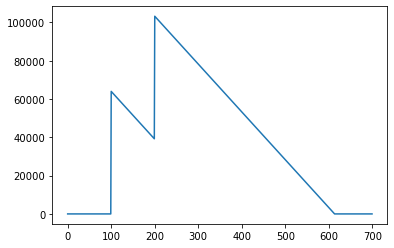

In [44]:
plt.plot(m[0].synapses[0].run(time=700))

In [ ]:
s = m[i].synapses
lv = m[i].run(t)[-1]
thresholds[i] = thresholds[i] - int(eta*(thresholds[i] - lv))
for j in range(neuron_input_num): #len(synapse_weights[0])):
    s[j].run(time=t)
    tr = int(s[j].membrane_potential/2**bits)
    synapse_weights[i][j] = synapse_weights[i][j]-int(eta*(synapse_weights[i][j]-tr))